In [1]:
import numpy as np
import pandas as pd
import pyodbc

import helper
import dataloader

In [2]:
import stock_analysis
from stock_analysis.utils import group_stocks, describe_group
from datetime import datetime

In [3]:
fromdate = '2020-01-01'
until = datetime.today().strftime('%Y-%m-%d')

In [4]:
scrips = pd.read_csv('myPortfolio.csv')
scrips = scrips.dropna(how='all', axis=1)

In [5]:
reader = stock_analysis.StockReader(fromdate, until)

(
PIDILITIND
,JUBLINGREA
,AMBER
,METROPOLIS
,SUPRAJIT
,SONACOMS
,FEDERALBNK
,HDFCBANK
,NEWGEN
,NATCOPHARM
,LTTS
,TATASTEEL
,MARICO
,HCLTECH
,DEVYANI
,MPHASIS
,LTIM
,ASHOKLEY
,DATAPATTNS
,ITC
,AUBANK
,COFORGE
,TECHM
,INFY
,NIFTY
) = (
    reader.get_ticker_data(ticker)
    for ticker in [
            'PIDILITIND.NS'
            ,'JUBLINGREA.NS'
            ,'AMBER.NS'
            ,'METROPOLIS.NS'
            ,'SUPRAJIT.NS'
            ,'SONACOMS.NS'
            ,'FEDERALBNK.NS'
            ,'HDFCBANK.NS'
            ,'NEWGEN.NS'
            ,'NATCOPHARM.NS'
            ,'LTTS.NS'
            ,'TATASTEEL.NS'
            ,'MARICO.NS'
            ,'HCLTECH.NS'
            ,'DEVYANI.NS'
            ,'MPHASIS.NS'
            ,'LTIM.NS'
            ,'ASHOKLEY.NS'
            ,'DATAPATTNS.NS'
            ,'ITC.NS'
            ,'AUBANK.NS'
            ,'COFORGE.NS'
            ,'TECHM.NS'
            ,'INFY.NS'
            ,'^NSEI']
)

# # get S&P 500 data
# nifty = reader.get_index_data('Nifty 50')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

<AxesSubplot: xlabel='date'>

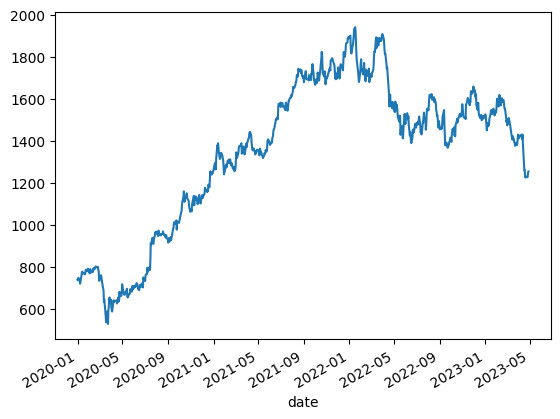

In [7]:
INFY.close.plot()

<AxesSubplot: xlabel='date'>

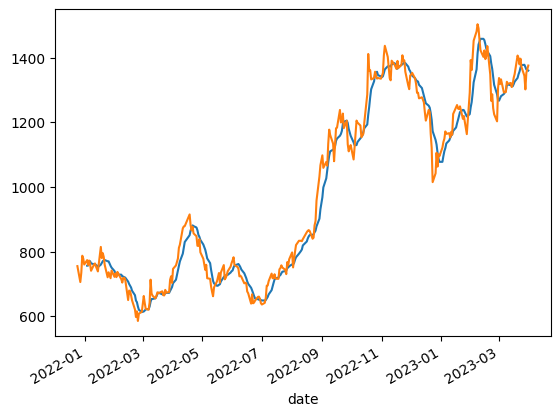

In [66]:
ax = DATAPATTNS.close.rolling(7).mean().plot()
DATAPATTNS.close.plot(ax=ax)

## EDA
We can group our assets together in dataframes in order to perform EDA:

In [67]:
mystocks_nifty = group_stocks(
    {
        scrip: eval(scrip) for scrip in scrips['Scrip'] 
    }
)

mystocks_nifty

,adj_close,close,high,low,name,open,volume
date,,,,,,,
2020-01-01,1388.073364,1405.349976,1412.000000,1387.000000,PIDILITIND,1388.050049,252523
2020-01-02,1381.850830,1399.050049,1411.000000,1395.500000,PIDILITIND,1405.000000,206412
2020-01-03,1380.468018,1397.650024,1402.900024,1391.550049,PIDILITIND,1395.500000,243932
2020-01-06,1370.640259,1387.699951,1394.900024,1381.949951,PIDILITIND,1387.349976,789499
2020-01-07,1382.492798,1399.699951,1431.849976,1390.000000,PIDILITIND,1390.099976,863685
...,...,...,...,...,...,...,...
2023-03-24,1101.949951,1101.949951,1118.000000,1096.650024,TECHM,1105.000000,1943460
2023-03-27,1103.000000,1103.000000,1113.650024,1090.099976,TECHM,1090.099976,1455300
2023-03-28,1070.300049,1070.300049,1104.599976,1066.199951,TECHM,1099.000000,2431154


In [68]:
from stock_analysis.utils import group_stocks, describe_group

# mystocks_nifty = group_stocks(
#     {
#         'TataSteel': tatasteel, 
#         'TechM': techm, 
#         'HCL': hcl, 
#         'Datapatterns': datapatterns, 
#         'LTIM': lti,
#         'Nifty': nifty
#     }
# )

mystocks = group_stocks(
    {
        scrip: eval(scrip) for scrip in scrips['Scrip'] if scrip != 'NIFTY'
    }
)

mystocks_nifty = group_stocks(
    {
        scrip: eval(scrip) for scrip in pd.concat([scrips['Scrip'],pd.Series(['NIFTY'])])
    }
)

In [69]:
mystocks_nifty.name.unique()

array(['PIDILITIND', 'JUBLINGREA', 'AMBER', 'METROPOLIS', 'SUPRAJIT',
       'SONACOMS', 'FEDERALBNK', 'HDFCBANK', 'NEWGEN', 'NATCOPHARM',
       'LTTS', 'TATASTEEL', 'MARICO', 'HCLTECH', 'DEVYANI', 'MPHASIS',
       'LTIM', 'ASHOKLEY', 'DATAPATTNS', 'ITC', 'AUBANK', 'COFORGE',
       'TECHM', 'NIFTY'], dtype=object)

In [70]:
mystocks

,adj_close,close,high,low,name,open,volume
date,,,,,,,
2020-01-01,1388.073364,1405.349976,1412.000000,1387.000000,PIDILITIND,1388.050049,252523
2020-01-02,1381.850830,1399.050049,1411.000000,1395.500000,PIDILITIND,1405.000000,206412
2020-01-03,1380.468018,1397.650024,1402.900024,1391.550049,PIDILITIND,1395.500000,243932
2020-01-06,1370.640259,1387.699951,1394.900024,1381.949951,PIDILITIND,1387.349976,789499
2020-01-07,1382.492798,1399.699951,1431.849976,1390.000000,PIDILITIND,1390.099976,863685
...,...,...,...,...,...,...,...
2023-03-24,1101.949951,1101.949951,1118.000000,1096.650024,TECHM,1105.000000,1943460
2023-03-27,1103.000000,1103.000000,1113.650024,1090.099976,TECHM,1090.099976,1455300
2023-03-28,1070.300049,1070.300049,1104.599976,1066.199951,TECHM,1099.000000,2431154


In [71]:
(
    mystocks
        .reset_index()
        .set_index('name')
        .merge(scrips, left_on='name', right_on='Scrip')
        .set_index('date')
        .assign(value = lambda _df: _df['close']* _df['Quantity'])
        .groupby('date').value.sum()
        .pct_change().cumsum()
)

date
2020-01-01         NaN
2020-01-02    0.011569
2020-01-03    0.013872
2020-01-06    0.001437
2020-01-07    0.010382
                ...   
2023-03-24    0.860856
2023-03-27    0.853768
2023-03-28    0.843332
2023-03-29    0.860394
2023-03-31    0.878410
Name: value, Length: 809, dtype: float64

In [72]:
mystocks.groupby('date').close.sum()


date
2020-01-01    14599.424934
2020-01-02    14607.335083
2020-01-03    14614.445087
2020-01-06    14500.424870
2020-01-07    14685.609787
                  ...     
2023-03-24    27933.100250
2023-03-27    27767.450272
2023-03-28    27467.849808
2023-03-29    27844.449928
2023-03-31    28441.750031
Name: close, Length: 809, dtype: float64

In [73]:
NIFTY.resample('1D').close.sum()

date
2020-01-01    12182.500000
2020-01-02    12282.200195
2020-01-03    12226.650391
2020-01-04        0.000000
2020-01-05        0.000000
                  ...     
2023-03-27    16985.699219
2023-03-28    16951.699219
2023-03-29    17080.699219
2023-03-30        0.000000
2023-03-31    17359.750000
Freq: D, Name: close, Length: 1186, dtype: float64

In [74]:
(mystocks #['2022-05-24':]
        .reset_index()
        .set_index('name')#.loc['DATAPATTNS']
        .merge(scrips, left_on='name', right_on='Scrip')
        .set_index('date').sort_index()
        .assign(value = lambda _df: _df['close']* _df['Quantity'])
        .groupby('date').value.sum()
        .pct_change()).fillna(0).add(1).cumprod().sub(1).mul(100).tail()

date
2023-03-24    113.575591
2023-03-27    112.061869
2023-03-28    109.848775
2023-03-29    113.429151
2023-03-31    117.274336
Name: value, dtype: float64

In [105]:
1/(1+ np.exp(-2.1))

0.8909031788043871

<AxesSubplot: xlabel='date'>

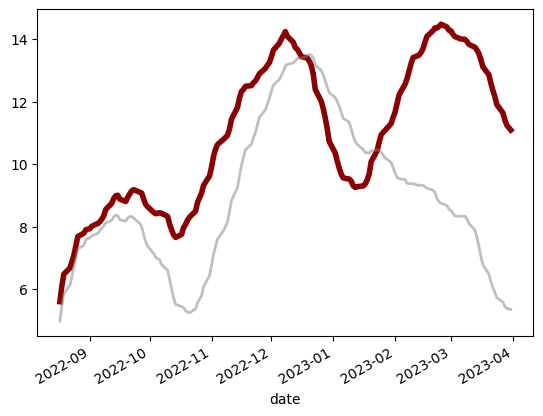

In [99]:
ax = (
    mystocks['2022-07-19':]
        .reset_index()
        .set_index('name')#.loc['DATAPATTNS']
        .merge(scrips, left_on='name', right_on='Scrip')
        .set_index('date').sort_index()
        .assign(value = lambda _df: _df['close']* _df['Quantity'])
        .groupby('date').value.sum()
        .pct_change().fillna(0).add(1).cumprod().sub(1).mul(100)
).rolling(20).mean().plot(c='darkred', lw=4)
NIFTY['2022-07-19':].sort_index().groupby('date').close.sum().pct_change().fillna(0).add(1).cumprod().sub(1).mul(100).rolling(20).mean().plot(ax=ax, c='grey', lw=2, alpha = 0.5)

# plt.legend()
# plt.grid()      


In [ ]:
(
    mystocks #['2022-05-24':]
        .reset_index()
        .set_index('name')#.loc['DATAPATTNS']
        .merge(scrips, left_on='name', right_on='Scrip')
        .set_index('date').sort_index()
        .assign(value = lambda _df: _df['close']* _df['Quantity'])
        .groupby('date').value.sum()
        .pct_change().fillna(0).add(1).cumprod().sub(1).mul(100)
).tail()

date
2023-03-23    116.003128
2023-03-24    113.575591
2023-03-27    112.061869
2023-03-28    109.848775
2023-03-29    113.429151
Name: value, dtype: float64

In [ ]:
NIFTY.sort_index().groupby('date').close.sum().pct_change().fillna(0).add(1).cumprod().sub(1).mul(100).tail()

date
2023-03-23    40.175665
2023-03-24    39.093378
2023-03-27    39.427041
2023-03-28    39.147952
2023-03-29    40.206848
Name: close, dtype: float64

In [ ]:
def colors(series):
      if series<0:
          return 'red'
      else:
          return 'blue'

In [76]:
(
    mystocks
    .groupby('name')
    .close.last()
    .to_frame()
    .merge(scrips, how = 'inner', left_on='name', right_on = 'Scrip')
    .set_index('Scrip')
    .rename(columns={'close': 'CurrentPrice', 'Avg Trading Price': 'BuyPrice'})
    .assign(
        InvestedValue = lambda _df: _df['Quantity']*_df['BuyPrice'],
        CurrentValue = lambda _df: _df['Quantity']*_df['CurrentPrice'],
        Profit = lambda _df: _df['CurrentValue']-_df['InvestedValue'],
        ProfitPercent = lambda _df: _df['Profit'] *100/_df['InvestedValue'],
        OverallNetProfit = lambda _df: _df['Profit'].sum(),
        OverallNetProfitPercent = lambda _df: _df['OverallNetProfit']*100/(_df['InvestedValue'].sum()),
        ContributionToOverallProfit = lambda _df: _df['Profit']*100/_df['OverallNetProfit'],
    )
)

,CurrentPrice,Company Name,MarketCap,Sector,Quantity,BuyPrice,InvestedValue,CurrentValue,Profit,ProfitPercent,OverallNetProfit,OverallNetProfitPercent,ContributionToOverallProfit
Scrip,,,,,,,,,,,,,
AMBER,1824.599976,Amber Enterp.,MidCap,Consumer Durables - Electronics,18,2265.10,40771.80,32842.799561,-7929.000439,-19.447266,68393.794928,10.114439,-11.593158
ASHOKLEY,139.199997,Ashok Leyland,LargeCap,Auto - Trucks,276,140.35,38736.60,38419.199158,-317.400842,-0.819382,68393.794928,10.114439,-0.464078
AUBANK,579.200012,AU Small Finance,LargeCap,Private Banks,12,595.48,7145.76,6950.400146,-195.359854,-2.733927,68393.794928,10.114439,-0.285640
COFORGE,3814.100098,Coforge,LargeCap,IT - Software,12,3663.71,43964.52,45769.201172,1804.681172,4.104858,68393.794928,10.114439,2.638662
DATAPATTNS,1375.699951,Data Pattern,MidCap,IT - Software,66,723.51,47751.66,90796.196777,43044.536777,90.142493,68393.794928,10.114439,62.936319
DEVYANI,144.649994,Devyani Intl.,MidCap,Lifestyle,50,164.50,8225.00,7232.499695,-992.500305,-12.066873,68393.794928,10.114439,-1.451155
FEDERALBNK,132.300003,Federal Bank,LargeCap,Private Banks,250,84.75,21187.50,33075.000763,11887.500763,56.106198,68393.794928,10.114439,17.380964
HCLTECH,1085.250000,HCL Technologies,LargeCap,IT - Software,64,987.03,63169.92,69456.000000,6286.080000,9.951065,68393.794928,10.114439,9.191009
HDFCBANK,1609.550049,HDFC Bank,LargeCap,Private Banks,6,1366.67,8200.02,9657.300293,1457.280293,17.771668,68393.794928,10.114439,2.130720


<AxesSubplot: xlabel='Scrip'>

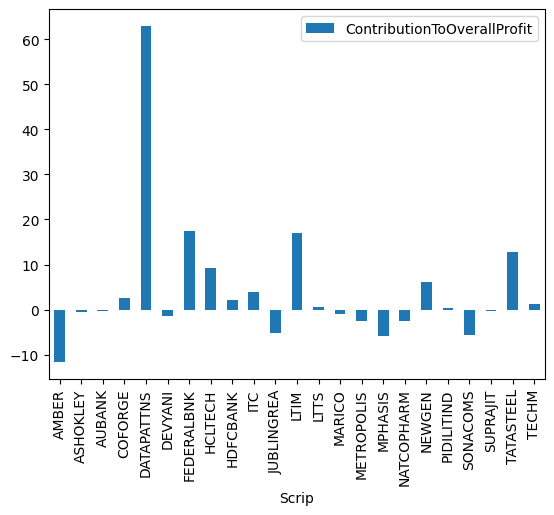

In [77]:
(
    mystocks
    .groupby('name')
    .close.last()
    .to_frame()
    .merge(scrips, how = 'inner', left_on='name', right_on = 'Scrip')
    .set_index('Scrip')
    .rename(columns={'close': 'CurrentPrice', 'Avg Trading Price': 'BuyPrice'})
    .assign(
        InvestedValue = lambda _df: _df['Quantity']*_df['BuyPrice'],
        CurrentValue = lambda _df: _df['Quantity']*_df['CurrentPrice'],
        Profit = lambda _df: _df['CurrentValue']-_df['InvestedValue'],
        ProfitPercent = lambda _df: _df['Profit'] *100/_df['InvestedValue'],
        OverallNetProfit = lambda _df: _df['Profit'].sum(),
        OverallNetProfitPercent = lambda _df: _df['OverallNetProfit']*100/(_df['InvestedValue'].sum()),
        ContributionToOverallProfit = lambda _df: _df['Profit']*100/_df['OverallNetProfit'],
        ColorProfit = lambda _df: _df['Profit'].apply(colors)
    )
).plot.bar(y='ContributionToOverallProfit',)

In [8]:
pd.date_range(fromdate, until, freq='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2023-03-12', '2023-03-13', '2023-03-14', '2023-03-15',
               '2023-03-16', '2023-03-17', '2023-03-18', '2023-03-19',
               '2023-03-20', '2023-03-21'],
              dtype='datetime64[ns]', length=1176, freq='D')

In [9]:
myfive_nifty.columns

Index(['adj_close', 'close', 'high', 'low', 'name', 'open', 'volume'], dtype='object')

In [10]:
df = pd.DataFrame()
for stock in myfive_nifty.name.unique():
    alldays = (myfive_nifty[myfive_nifty['name'] == stock].reindex(pd.date_range(fromdate, until, freq='D'))
    .rename_axis('date')
    .reset_index()[['date', 'name', 'open', 'high', 'low', 'close', 'adj_close', 'volume']]
    .assign(name = lambda _df: _df.name.fillna(method= 'ffill'),
            isIndex = lambda _df: _df['name']=='Nifty',
            volume = lambda _df: _df.volume.fillna(0),
            close = lambda _df: _df.close.fillna(method='ffill'),
            open = lambda _df: np.where(_df.open.isnull(), _df.close, _df.open,),
            high = lambda _df: np.where(_df.high.isnull(), _df.close, _df.high,),
            low = lambda _df: np.where(_df.low.isnull(), _df.close, _df.low,),
            adj_close = lambda _df: np.where(_df.adj_close.isnull(), _df.close, _df.adj_close,),
        )
    )
    df = pd.concat([df, alldays])

df

,date,name,open,high,low,close,adj_close,volume,isIndex
0,2020-01-01,TataSteel,47.299999,47.650002,46.480000,46.775002,19.823256,121005300.0,False
1,2020-01-02,TataSteel,47.200001,48.779999,47.200001,48.485001,20.547955,216749610.0,False
2,2020-01-03,TataSteel,48.299999,48.619999,47.945000,48.369999,20.499214,129568630.0,False
3,2020-01-04,TataSteel,48.369999,48.369999,48.369999,48.369999,48.369999,0.0,False
4,2020-01-05,TataSteel,48.369999,48.369999,48.369999,48.369999,48.369999,0.0,False
...,...,...,...,...,...,...,...,...,...
1171,2023-03-17,Nifty,17111.800781,17145.800781,16958.150391,17100.050781,17100.050781,408100.0,True
1172,2023-03-18,Nifty,17100.050781,17100.050781,17100.050781,17100.050781,17100.050781,0.0,True
1173,2023-03-19,Nifty,17100.050781,17100.050781,17100.050781,17100.050781,17100.050781,0.0,True
1174,2023-03-20,Nifty,17066.599609,17066.599609,16828.349609,16988.400391,16988.400391,241800.0,True


<AxesSubplot: xlabel='date'>

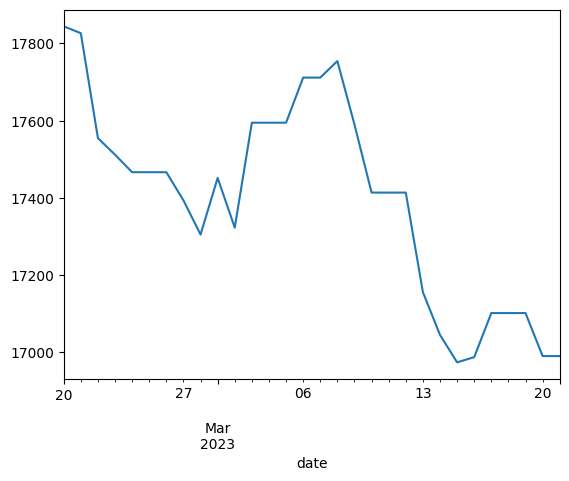

In [11]:
df[df['name']=='Nifty'][['date','name', 'close']].set_index('date').last('5W').close.plot()


<AxesSubplot: xlabel='date'>

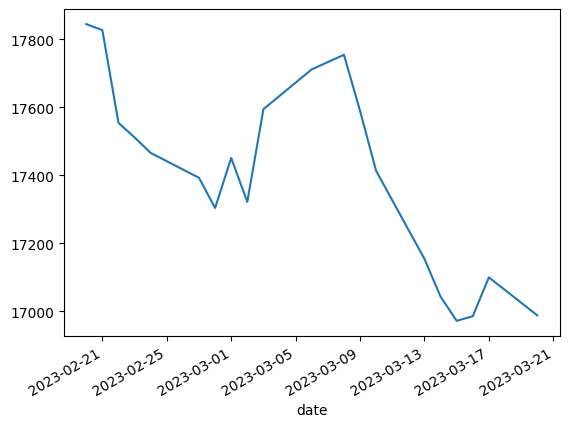

In [12]:
nifty.close.last('5W').plot()

In [223]:
mystocks_nifty.name.unique()


array(['PIDILITIND', 'JUBLINGREA', 'AMBER', 'METROPOLIS', 'SUPRAJIT',
       'SONACOMS', 'FEDERALBNK', 'HDFCBANK', 'NEWGEN', 'NATCOPHARM',
       'LTTS', 'TATASTEEL', 'MARICO', 'HCLTECH', 'DEVYANI', 'MPHASIS',
       'LTIM', 'ASHOKLEY', 'DATAPATTNS', 'ITC', 'AUBANK', 'COFORGE',
       'TECHM', 'NIFTY'], dtype=object)

In [282]:
toload = (mystocks_nifty
.reset_index()[['date', 'name', 'open', 'high', 'low', 'close', 'adj_close', 'volume']]
.assign(isIndex = lambda _df: _df['name']=='NIFTY')
)

In [283]:
dataloader.full_load(df=toload, tbl="stocks", hasindex=False, custom = {"id": "INT PRIMARY KEY",
                                                                                  "date": "DATE"
          })

DataFrame full loaded to Table: stocks


In [284]:
dataloader.full_load(df=scrips.sort_values(by='Scrip'), tbl="scrips", hasindex=False, custom = {"id": "INT PRIMARY KEY"
          })

DataFrame full loaded to Table: scrips


In [200]:
scrips

,Scrip,Company Name,MarketCap,Sector,Quantity,Avg Trading Price,Unnamed: 6
1,PIDILITIND,Pidilite Inds.,LargeCap,FMCG,5,2303.49,NaN
2,JUBLINGREA,Jubilant Ingrev.,MidCap,Pharmaceuticals & Drugs,25,501.03,NaN
3,AMBER,Amber Enterp.,MidCap,Consumer Durables - Electronics,18,2265.10,NaN
4,METROPOLIS,Metropolis Healt,MidCap,Healthcare Services,6,1524.58,NaN
5,SUPRAJIT,Suprajit Engg.,SmallCap,Auto Anc,40,348.99,NaN
6,SONACOMS,Sona BLW Precis.,LargeCap,Castings/Forgings,24,573.38,NaN
7,FEDERALBNK,Federal Bank,LargeCap,Private Banks,250,84.75,NaN
8,HDFCBANK,HDFC Bank,LargeCap,Private Banks,6,1366.67,NaN
9,NEWGEN,Newgen Software,SmallCap,IT - Software,45,356.92,NaN
10,NATCOPHARM,Natco Pharma,MidCap,Pharma,20,652.42,NaN


This makes it easy to describe them all at once:

In [15]:
(describe_group(myfive_nifty).loc['close',]).T

,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
Datapatterns,308.0,975.823376,278.193692,585.349976,722.962479,858.100006,1242.812500,1503.500000
HCL,801.0,937.023844,221.886712,405.799988,827.150024,975.349976,1107.800049,1358.199951
LTIM,801.0,4096.257987,1527.307205,1293.099976,2964.800049,4191.200195,4856.049805,7561.750000
Nifty,800.0,14996.200431,2894.910216,7610.250000,12181.962402,15821.149902,17487.886719,18812.500000
TataSteel,801.0,88.028446,36.803306,25.375000,47.505001,104.250000,116.724998,151.940002
TechM,801.0,1044.510112,304.200733,487.200012,836.099976,1020.049988,1150.099976,1806.099976


### Visualizations
The `StockVisualizer` class makes it easy to create a variety of visualizations for financial analysis. We simply pass in the dataframe of the asset we want to visualize:

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

tatasteel_viz = stock_analysis.StockVisualizer(tatasteel)

In [18]:
type(tatasteel_viz)

stock_analysis.stock_visualizer.StockVisualizer

We can use the moving average to smooth out the trend for the stock. Notice that, in the shaded region, the 90-day moving average is acting like a ceiling for the stock price:

In [23]:
tatasteel.idxmax().close

Timestamp('2021-08-16 00:00:00')

[Text(0.5, 1.0, 'Tatasteel Closing Price'), Text(0, 0.5, 'price (rupees)')]

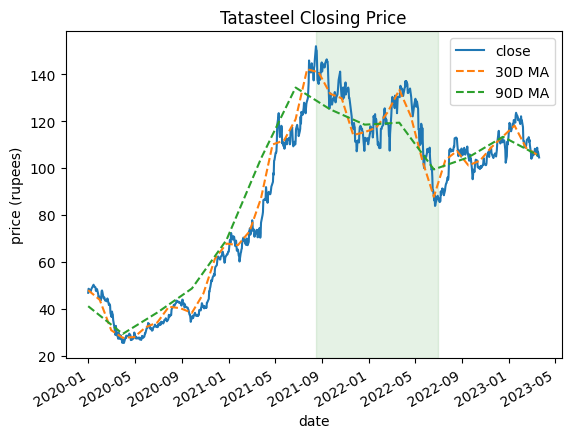

In [24]:
ax = tatasteel_viz.moving_average('close', ['30D', '90D'])
tatasteel_viz.shade_region(
    ax, x=(tatasteel.idxmax().close, '2022-06-30'), color='green', alpha=0.1
)
ax.set(title='Tatasteel Closing Price', ylabel='price (rupees)')

The moving average may be used to determine support and resistance levels. Support exerts upward pressure on the stock price (lower prices get people to buy) and resistance exerts downward force on the stock price (high prices cause people to sell):

In [28]:
# from visual_aids import finance_viz
# _ = finance_viz.support_and_resistance()

Sometimes exponential smoothing makes more sense because we can place higher importance on more recent values:

[Text(0.5, 1.0, 'Netflix Closing Price'), Text(0, 0.5, 'price ($)')]

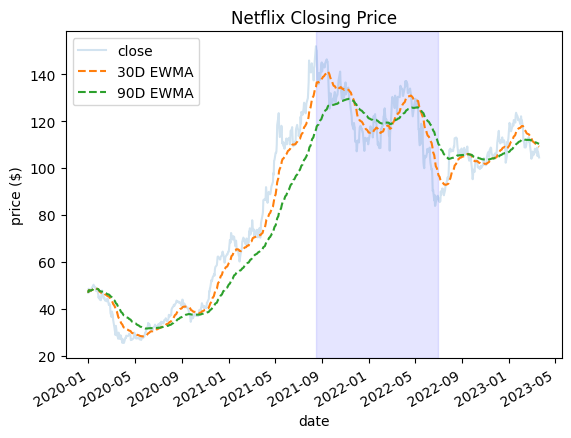

In [25]:
ax = tatasteel_viz.exp_smoothing('close', [30, 90], alpha = 0.2)
tatasteel_viz.shade_region(
    ax, x=(tatasteel.idxmax().close, '2022-06-30'), color='blue', alpha=0.1
)
ax.set(title='Netflix Closing Price', ylabel='price ($)')

---

**OPTIONAL SECTION**: Interactive Visualization of Moving Averages

---

We will now use widgets to create an interactive plot to see what different windows do to the moving average and exponentially smoothed moving average. Using the widget backend requires `ipympl`, which we installed back in chapter 1. However, depending on your Jupyter setup and machine you may also need to install `node.js` and with run a few commands from the command line. Try to run the cells below, and if that doesn't work follow the installation instructions [here](https://github.com/matplotlib/jupyter-matplotlib). Make sure to restart the kernel when you are set up.

First, we run this magic to enable the widgets back-end:

In [30]:
%matplotlib widget

Next, we run the code to generate the interactive visualization. This uses the `interact()` function from `ipywidgets`:

interactive(children=(IntSlider(value=20, description='period', max=200, min=5, step=5), Checkbox(value=False,…

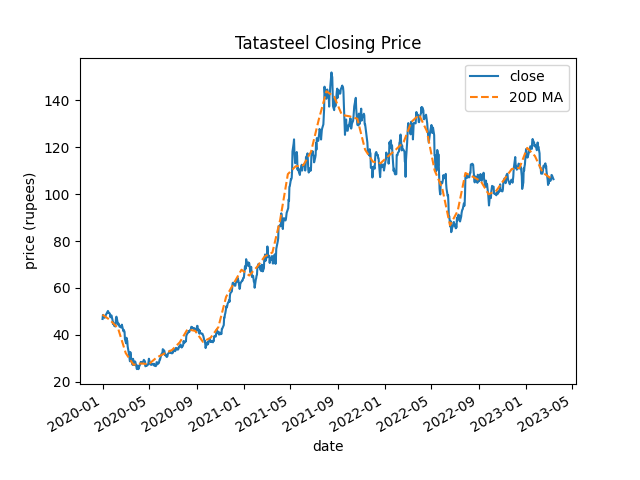

In [31]:
%matplotlib widget
from ipywidgets import interact

def moving_averages(viz):
    def plot_viz(period=20, exponentially_smoothed=False):
        if exponentially_smoothed:
            ax = tatasteel_viz.exp_smoothing('close', period)
        else:
            ax = tatasteel_viz.moving_average('close', str(period) + 'D')
        
        ax.set(title='Tatasteel Closing Price', ylabel='price (rupees)')
    
    return plot_viz
interact(moving_averages(tatasteel_viz), period=(5, 200, 5), exponentially_smoothed=False);

*More information on the `interact()` function can be found [here](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html).*

---

When finished with the interactive visualization, be sure to switch back to `inline` plots for the rest of the notebook:

In [32]:
%matplotlib inline

---

**END OPTIONAL SECTION**

---

Let's take a look at the effect of after-hours trading:

array([<AxesSubplot: title={'center': "After-hours trading\n(Open Price - Prior Day's Close)"}, xlabel='date', ylabel='price'>,
       <AxesSubplot: title={'center': 'After-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
      dtype=object)

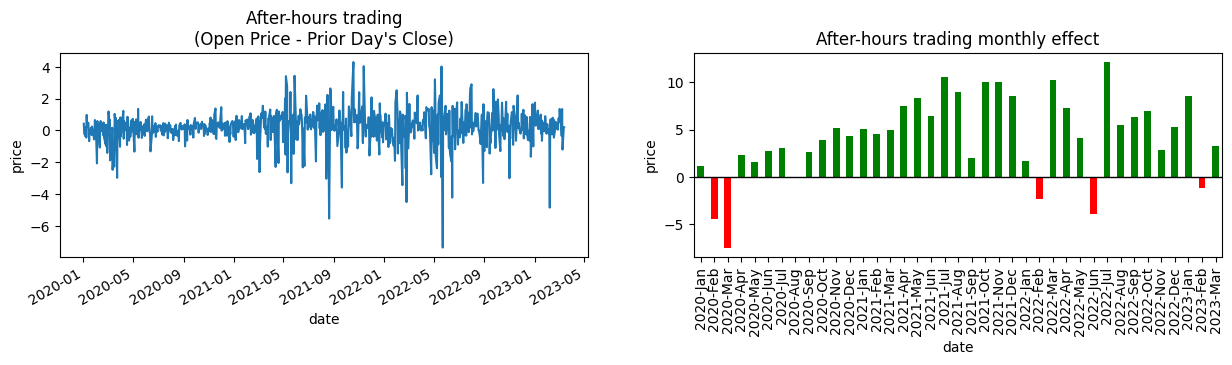

In [33]:
tatasteel_viz.after_hours_trades()

We can use a **candlestick plot** to study the OHLC data. More information on reading and interpreting this can be found [here](https://www.investopedia.com/trading/candlestick-charting-what-is-it/).

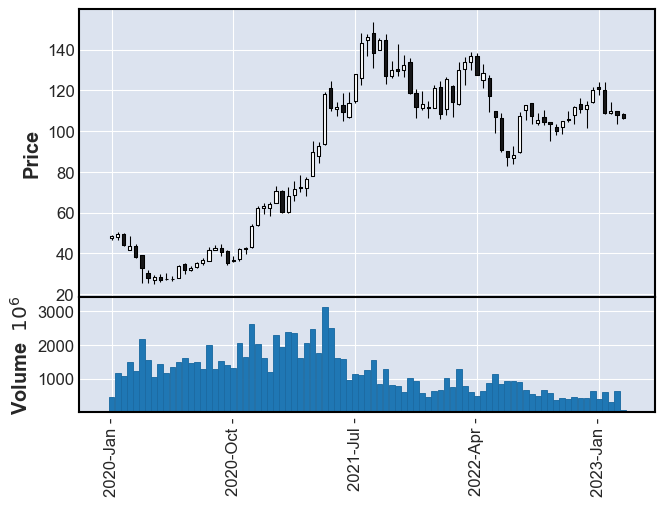

In [34]:
tatasteel_viz.candlestick(resample='2W', volume=True, xrotation=90, datetime_format='%Y-%b -')

The `mplfinance` package uses it's own stylesheets for plotting, so let's restore the defaults:

In [26]:
import matplotlib as mpl
mpl.rcdefaults()
%matplotlib inline

We can use a joint plot to see how Tata steel compared to the Nifty 50:

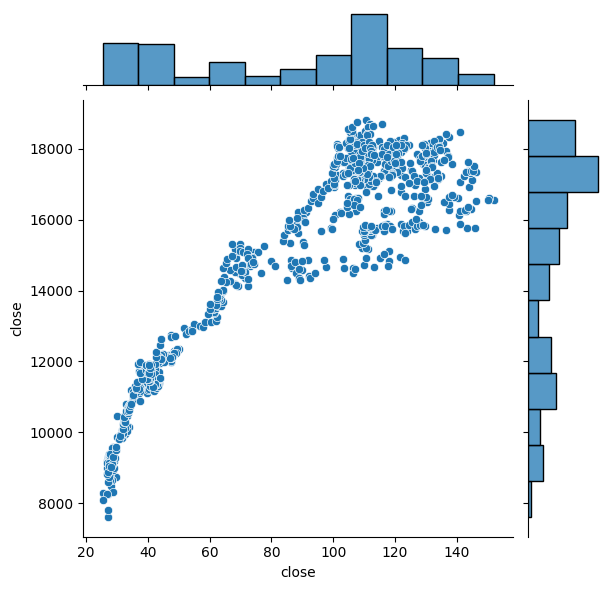

In [27]:
tatasteel_viz.jointplot(nifty, 'close')

We can also use the `correlation_heatmap()` function to look at the correlation of daily percent change. Here, we compare with Amazon:

<AxesSubplot: >

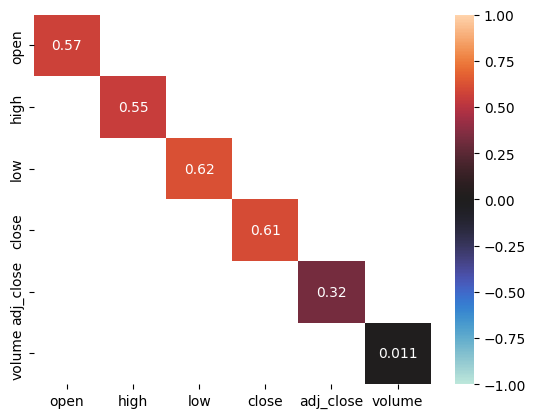

In [28]:
tatasteel_viz.correlation_heatmap(nifty)

We can use the `fill_between_other()` method to compare Netflix's stock price over time to another asset. Here, we look at Tesla:

In [29]:
hcl_viz = stock_analysis.StockVisualizer(hcl)
change_date = (hcl.close > techm.close).idxmax()
ax = hcl_viz.fill_between_other(jsw)
hcl_viz.add_reference_line(
    ax, 
    x=change_date, 
    color='k', 
    linestyle=':', 
    label=f'HCL > TECHM {change_date:%Y-%m-%d}',
    alpha=0.5
)

NameError: name 'jsw' is not defined

If we want to visualize groups of assets, we use the `AssetGroupVisualizer` class. Let's look at the correlations between the assets using percentage change:

<AxesSubplot: xlabel='name', ylabel='name'>

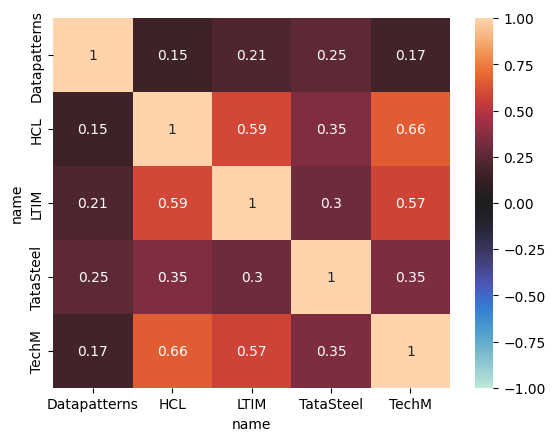

In [30]:
myfive_viz = stock_analysis.AssetGroupVisualizer(myfive)
myfive_viz.heatmap()

Bitcoin is on a much larger scale so we have to use subplots to compare it to the stock market:

<AxesSubplot: xlabel='date'>

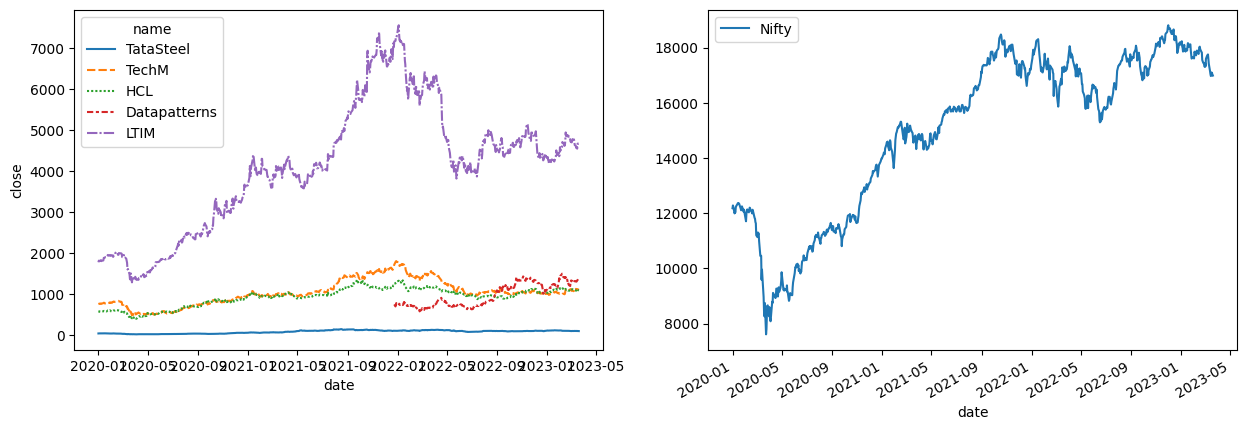

In [31]:
myfive_viz = stock_analysis.AssetGroupVisualizer(myfive)
nifty_viz = stock_analysis.StockVisualizer(nifty)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
myfive_viz.evolution_over_time('close', ax=axes[0], style=myfive_viz.group_by)
nifty_viz.evolution_over_time('close', ax=axes[1], label='Nifty')

### Additional Plots (not in text)
We can view the effect that after-hours trading had on each of the FAANG stocks:

array([[<AxesSubplot: title={'center': "Datapatterns Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <AxesSubplot: title={'center': 'Datapatterns after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<AxesSubplot: title={'center': "HCL Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <AxesSubplot: title={'center': 'HCL after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<AxesSubplot: title={'center': "LTIM Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <AxesSubplot: title={'center': 'LTIM after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<AxesSubplot: title={'center': "TataSteel Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <AxesSubplot: title={'center': 'TataSteel after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<AxesSubplot: title={'center': "TechM Open Price - Prior Day

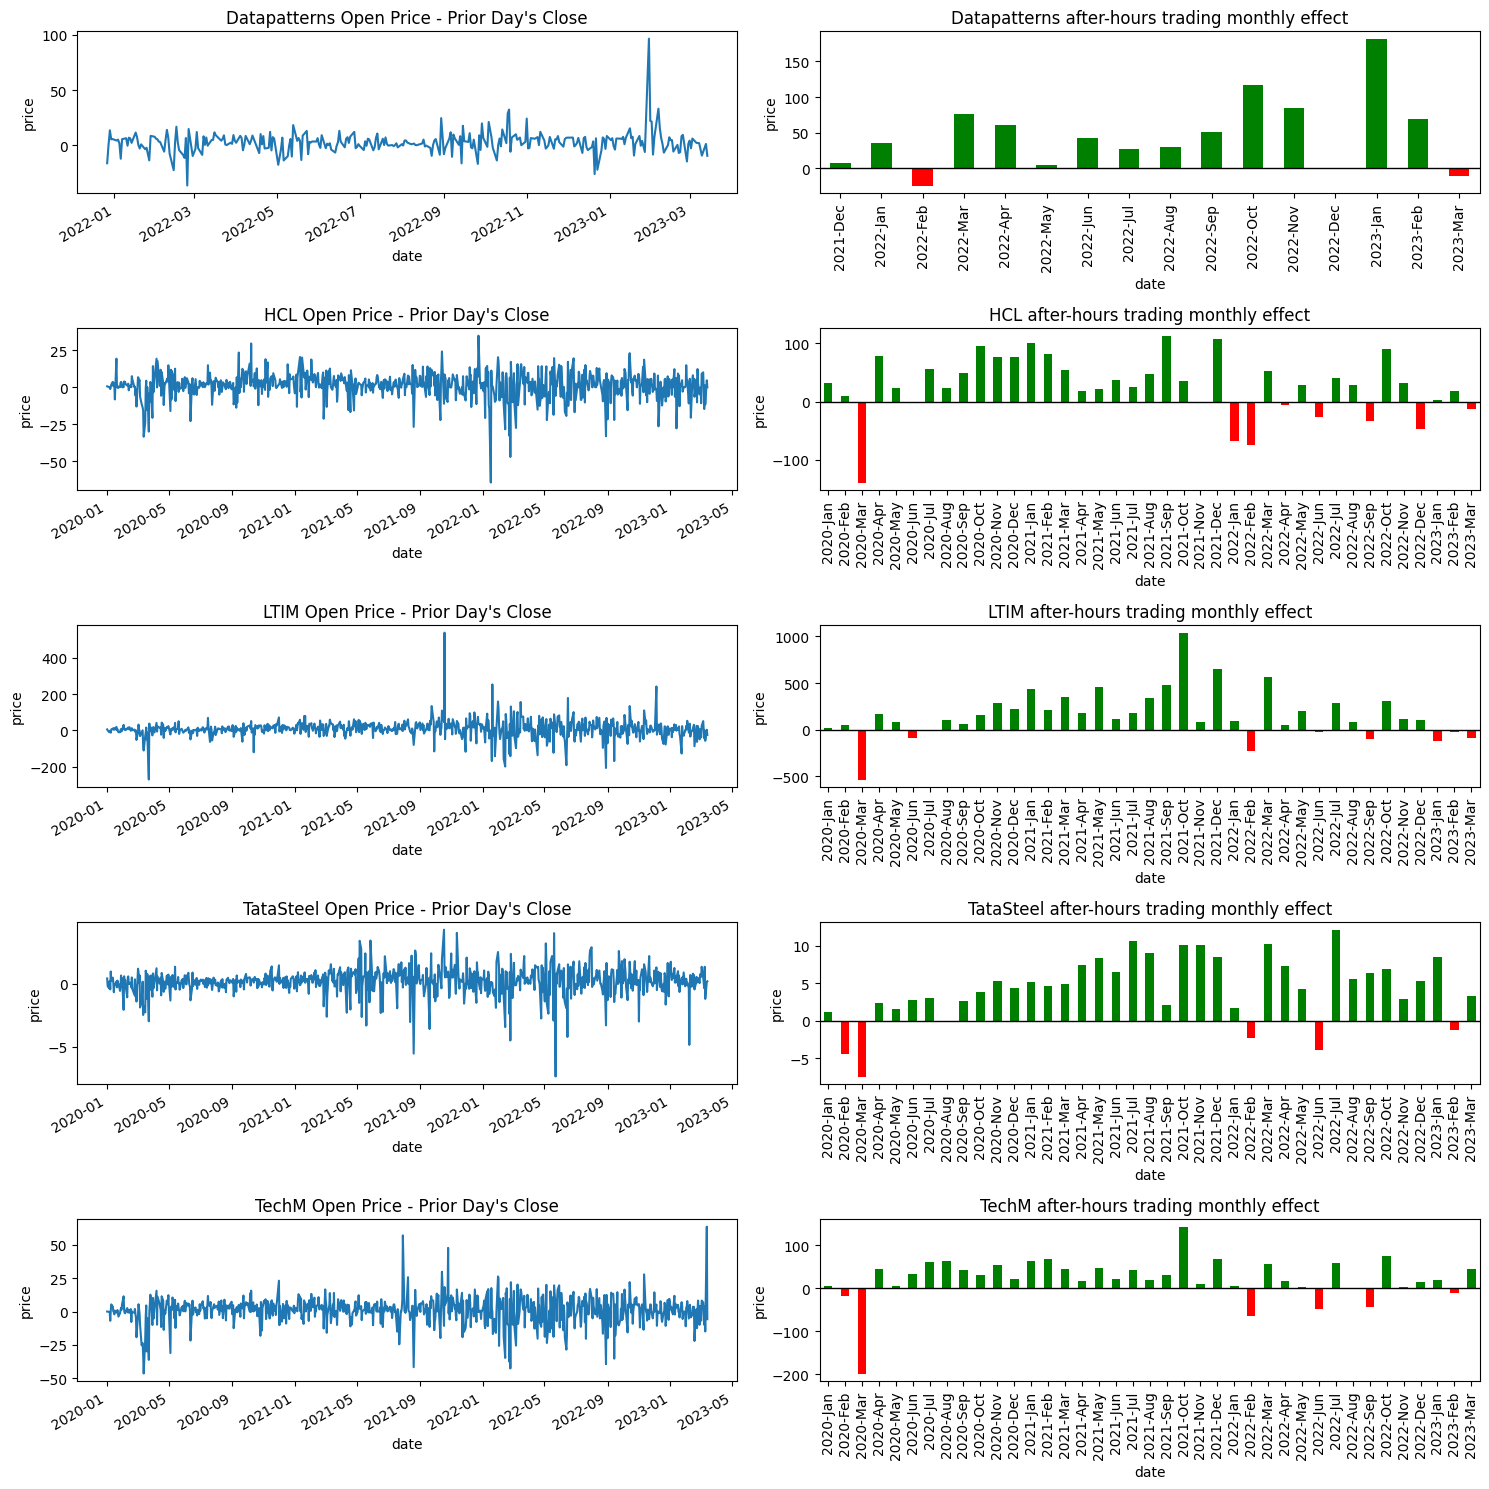

In [41]:
myfive_viz = stock_analysis.AssetGroupVisualizer(myfive)
myfive_viz.after_hours_trades()

We can look at what the exponentially smoothed moving averages look like for all FAANG stocks as well:

<AxesSubplot: xlabel='date'>

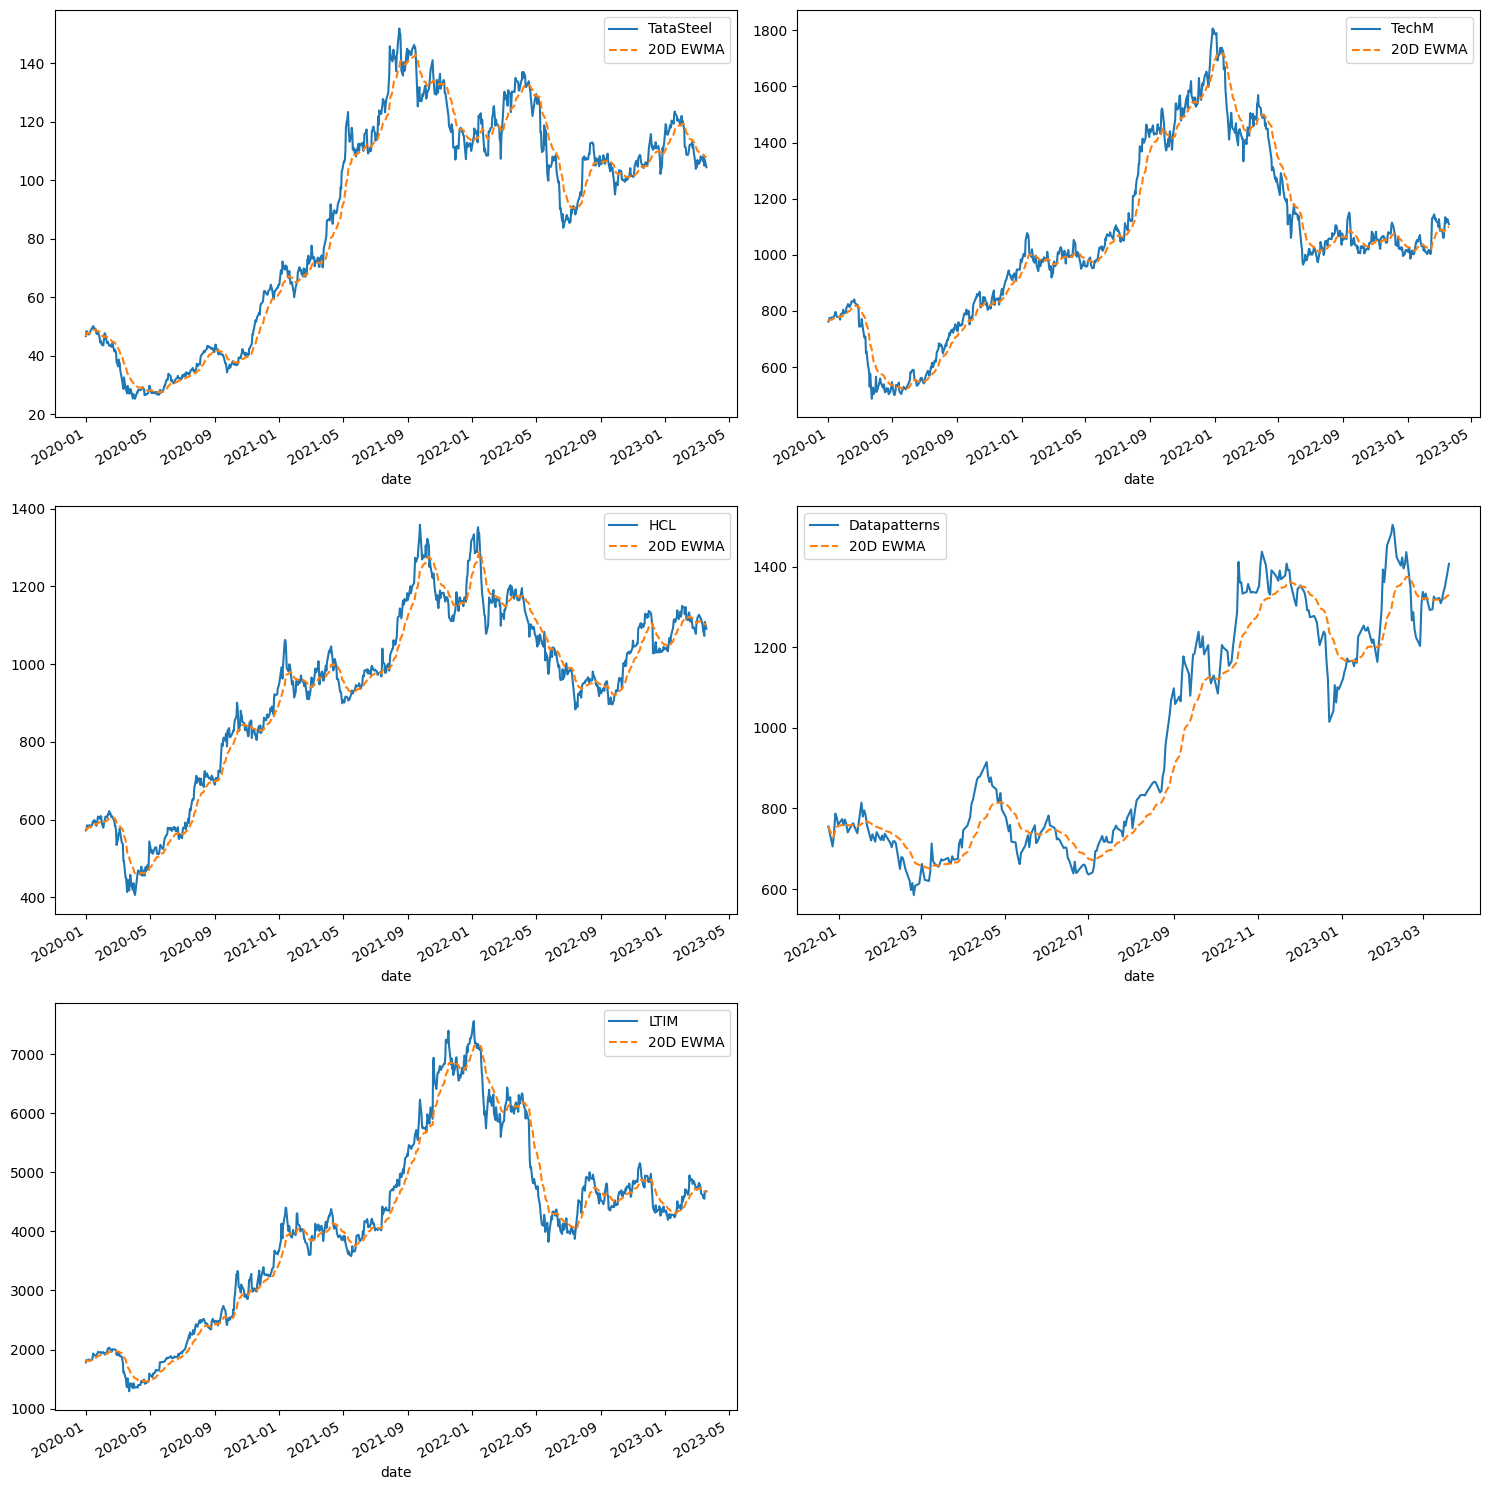

In [32]:
myfive_viz.exp_smoothing('close', 20)

With short windows, both these smoothing methods perform similarly:

<AxesSubplot: xlabel='date'>

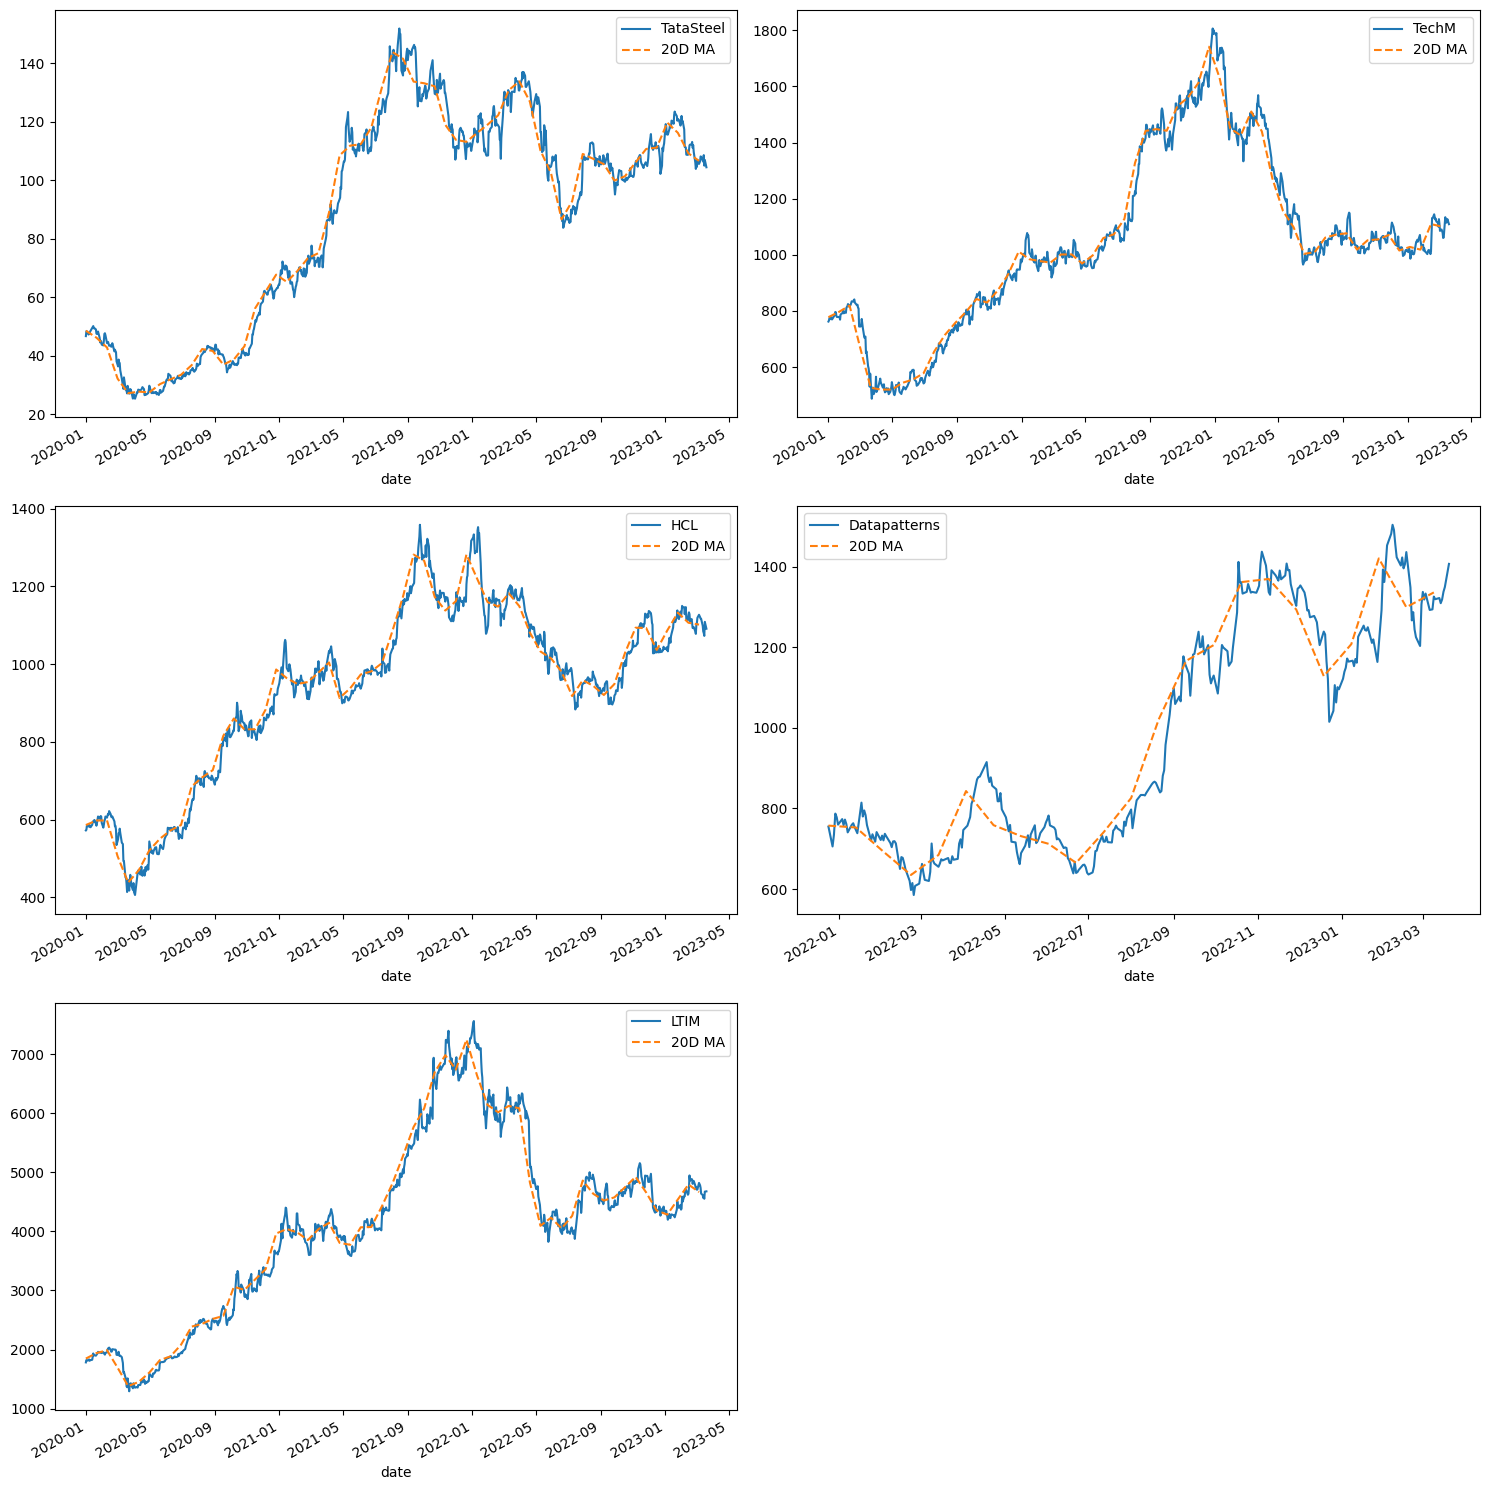

In [33]:
myfive_viz.moving_average('close', '20D')

The distributions of closing price across the FAANG stocks are quite different:

array([<AxesSubplot: title={'center': 'Datapatterns - close'}, xlabel='close', ylabel='Count'>,
       <AxesSubplot: title={'center': 'HCL - close'}, xlabel='close', ylabel='Count'>,
       <AxesSubplot: title={'center': 'LTIM - close'}, xlabel='close', ylabel='Count'>,
       <AxesSubplot: title={'center': 'TataSteel - close'}, xlabel='close', ylabel='Count'>,
       <AxesSubplot: title={'center': 'TechM - close'}, xlabel='close', ylabel='Count'>,
       <AxesSubplot: >], dtype=object)

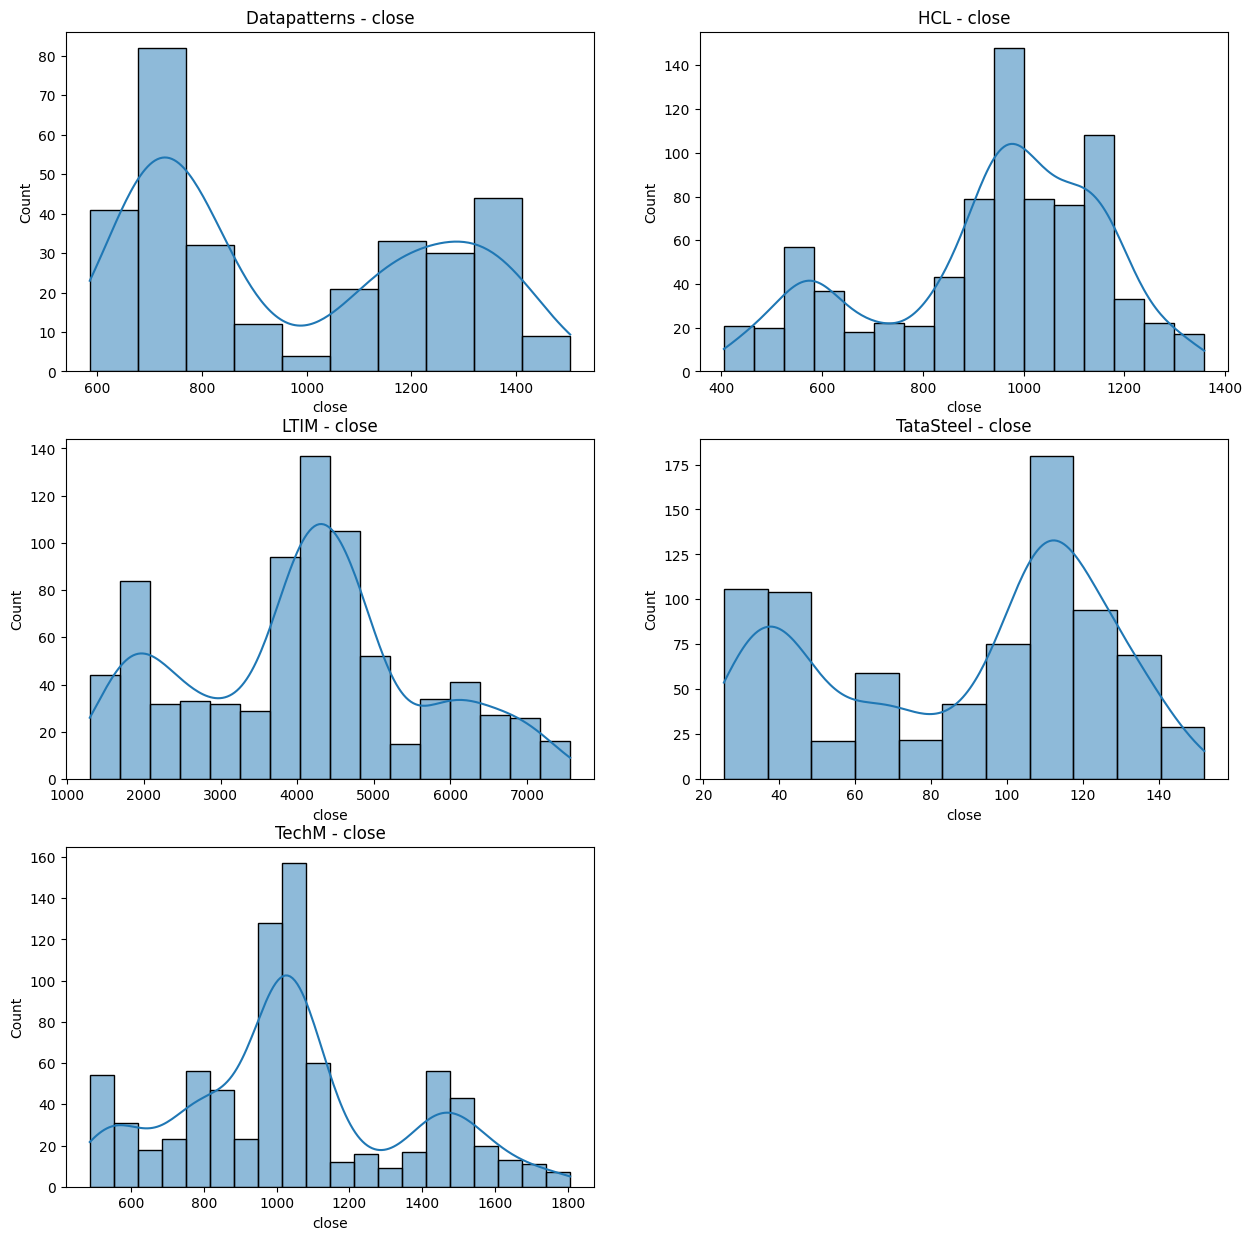

In [34]:
myfive_viz.histogram('close')

Viewing box plots we can easily see that Google and Amazon are on a much larger scale:

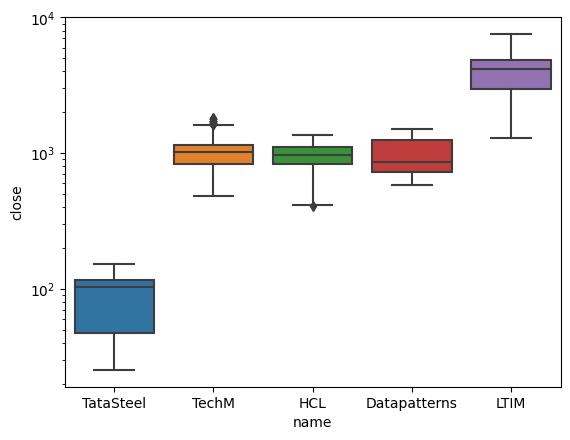

In [38]:
myfive_viz.boxplot('close')
plt.yscale('log')

Correlations between the stocks are weak:

<AxesSubplot: xlabel='name', ylabel='name'>

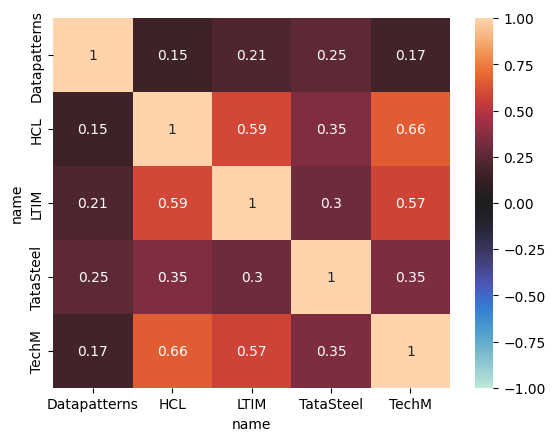

In [39]:
myfive_viz.heatmap()

We can view this information as scatter plots as well:

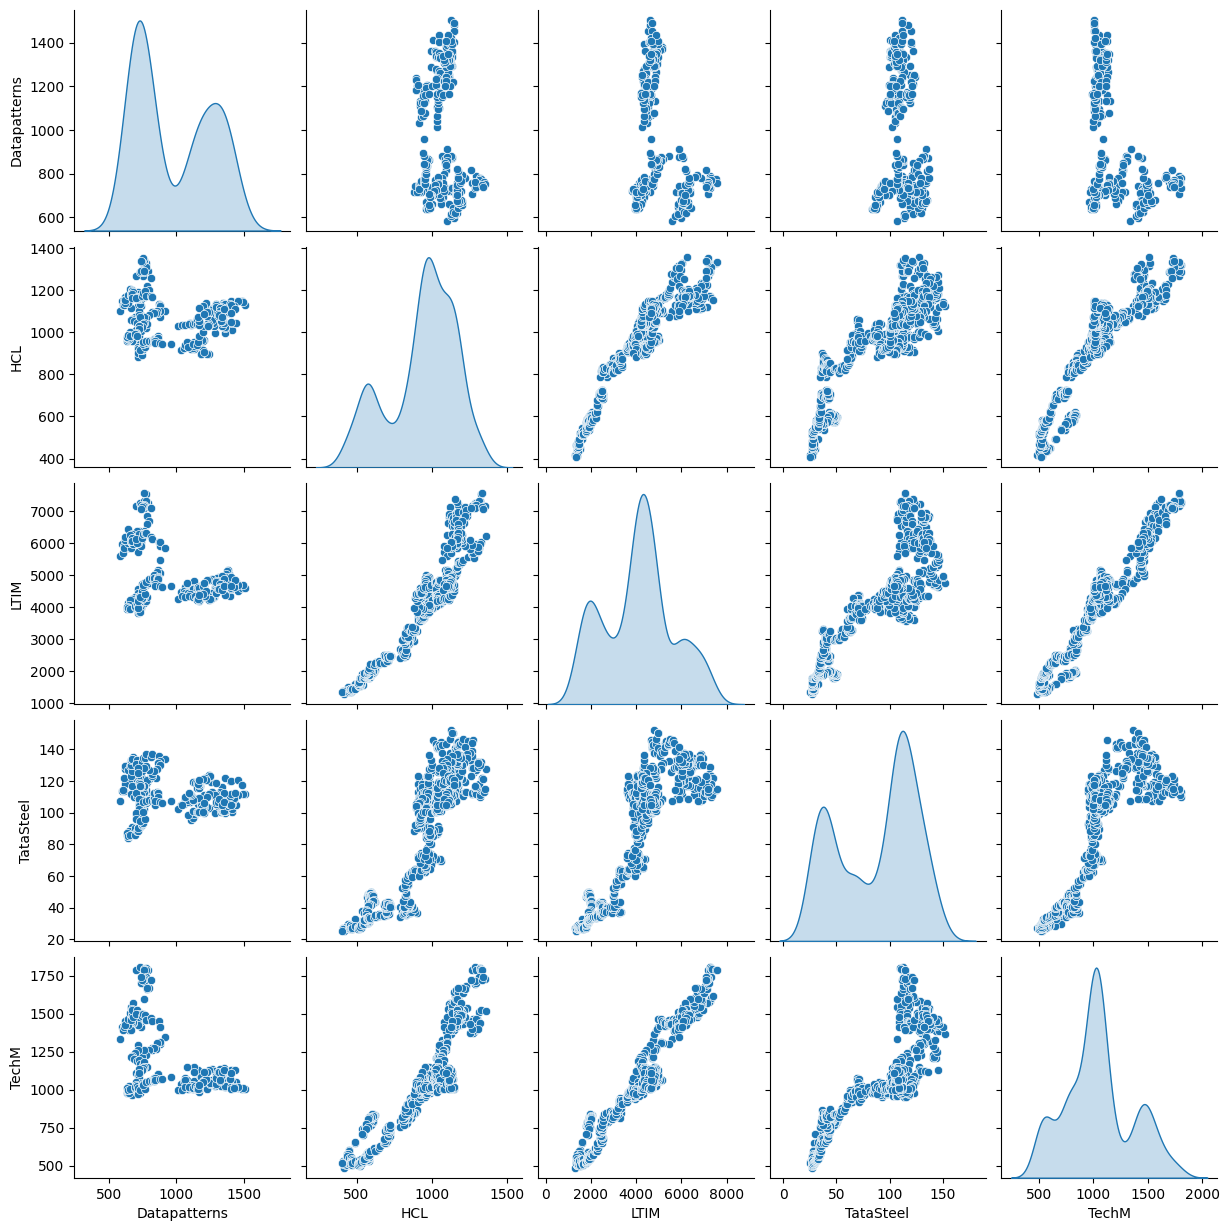

In [40]:
myfive_viz.pairplot()

## Technical Analysis
Technical analysis involves looking at metrics to understand the peformance of an asset.
### Single Asset
We can use the `StockAnalyzer` class to calculate metrics for us:

In [42]:
tatasteel_analyzer = stock_analysis.StockAnalyzer(tatasteel)

One such metric is annualized volatility:

In [43]:
tatasteel_analyzer.annualized_volatility()

0.3574784556209052

### Asset Groups
When working with groups, we use the `AssetGroupAnalyzer` class:

In [44]:
myfive_nifty_analyzer = stock_analysis.AssetGroupAnalyzer(myfive_nifty)

#### Coefficient of Variation
We can check how large the standard deviation is in terms of the mean of the stock price as another way to look at volatility. This shows that bitcoin is the most volatile:

In [45]:
myfive_nifty_analyzer.analyze('cv')

{'Datapatterns': 0.28508611168382586,
 'HCL': 0.2367994294775636,
 'LTIM': 0.37285425132477995,
 'Nifty': 0.1930429130322543,
 'TataSteel': 0.41808424378678427,
 'TechM': 0.29123771001206944}

#### Annualized Volatility

In [46]:
myfive_nifty_analyzer.analyze('annualized_volatility')

{'Datapatterns': 0.47812929721860836,
 'HCL': 0.23361880447341057,
 'LTIM': 0.33530042237771784,
 'Nifty': 0.14877637631709295,
 'TataSteel': 0.3574784556209052,
 'TechM': 0.2931899015270553}

#### Bull Market
We can check if the assets are in a bull market, meaning their value increased $\geq$ 20% in the last 2 months:

In [47]:
myfive_nifty_analyzer.analyze('is_bull_market')

{'Datapatterns': False,
 'HCL': False,
 'LTIM': False,
 'Nifty': False,
 'TataSteel': False,
 'TechM': False}

#### Bear Market
We can check if the assets are in a bear market, meaning their value dropped $\geq$ 20% in the last 2 months:

In [49]:
myfive_nifty_analyzer.analyze('is_bear_market')

{'Datapatterns': False,
 'HCL': False,
 'LTIM': False,
 'Nifty': False,
 'TataSteel': False,
 'TechM': False}

#### Beta
Beta tells us how an asset's performance correlates to a market index. A beta of 1 with the S&P 500 means the asset moves with the S&P 500. Notice bitcoin is below one because it is a different type of asset.

In [50]:
myfive_nifty_analyzer.analyze('beta', index=nifty)

{'Datapatterns': 0.5996007276231616,
 'HCL': 0.8141320659081406,
 'LTIM': 0.8319935174814801,
 'Nifty': 0.9999999999999999,
 'TataSteel': 1.1842269017946285,
 'TechM': 0.9173979017977344}

#### Alpha
Alpha allows us to compare the returns of an asset to an index. We can compare to the S&P 500 using the risk-free rate of return. You can look up rates [here](https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/TextView.aspx?data=yield) or use the `StockReader.get_risk_free_rate_of_return()` method. This shows that bitcoin much higher returns than the S&P 500 (due to scale) and Apple is the top performer among the FAANG stocks: 

In [51]:
r_f = reader.get_risk_free_rate_of_return()
myfive_nifty_analyzer.analyze('alpha', index=nifty, r_f=r_f)

TypeError: download() got multiple values for argument 'start'

#### Cumulative Returns
Cumulative returns show us what we would have made for a dollar investment at time period 0. This can be multiplied by the actual investment to get the return:

Text(0.5, 0.98, 'Cumulative Returns')

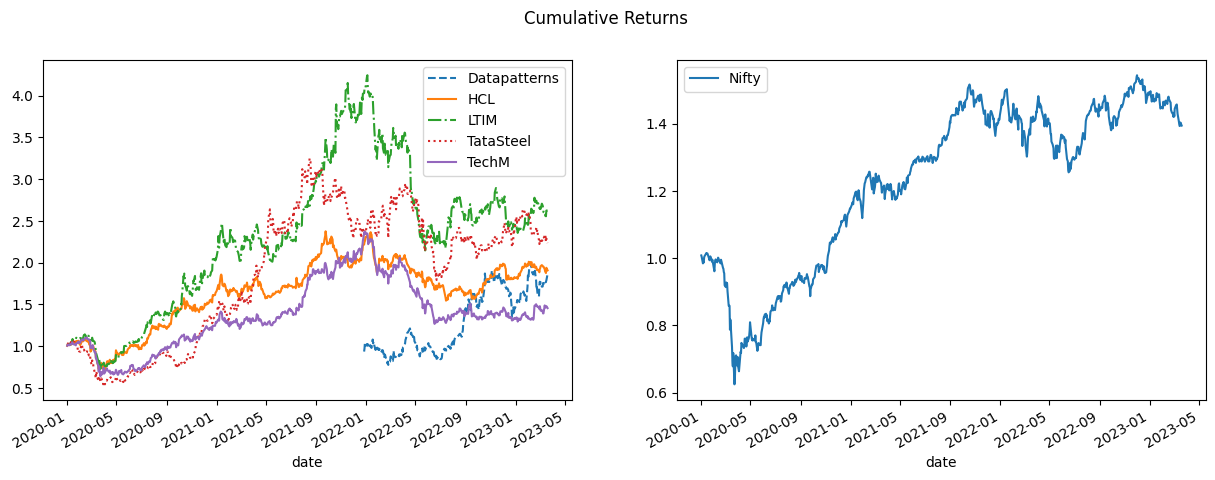

In [52]:
from cycler import cycler

# to make this a little easier to see in the black and white text
bw_viz_cycler = (
    cycler(color=[plt.get_cmap('tab10')(x/10) for x in range(10)])
    + cycler(linestyle=['dashed', 'solid', 'dashdot', 'dotted', 'solid'] * 2)
)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].set_prop_cycle(bw_viz_cycler)
cumulative_returns = myfive_nifty_analyzer.analyze('cumulative_returns')

for name, data in cumulative_returns.items():
    data.plot(
        ax=axes[1] if name == 'Nifty' else axes[0], 
        label=name,
        legend=True
    )
fig.suptitle('Cumulative Returns')

## Modeling
For modeling tasks, we can use the `StockModeler` class:

In [53]:
from stock_analysis import StockModeler

### Time Series Decomposition
We can decompose the Netflix time series into its trend, seasonality component, and residuals:

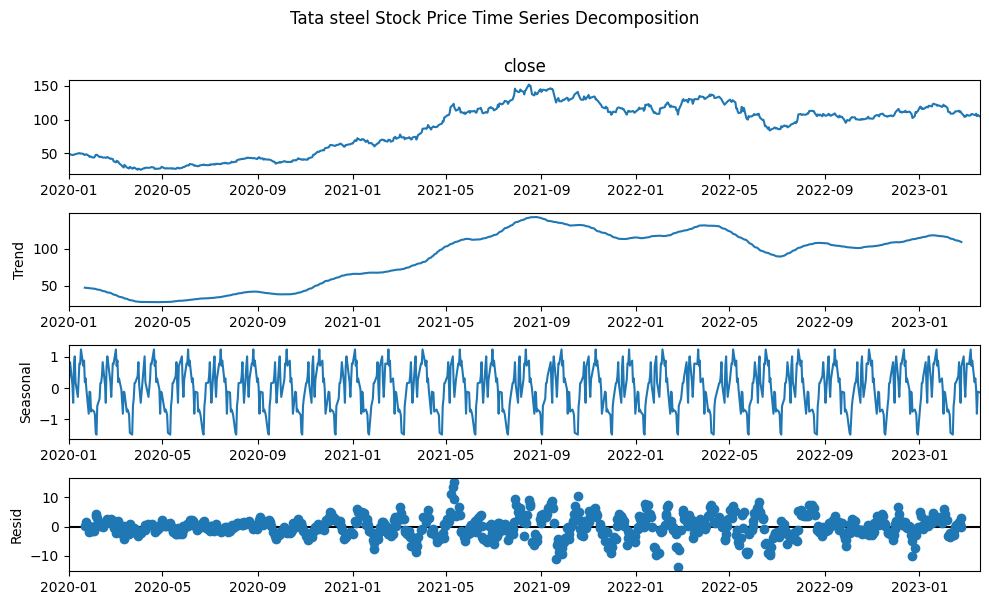

In [54]:
decomposition = StockModeler.decompose(tatasteel, 30) # 20 period frequency
fig = decomposition.plot()
fig.suptitle('Tata steel Stock Price Time Series Decomposition', y=1)
fig.set_figheight(6)
fig.set_figwidth(10)
fig.tight_layout()

### ARIMA
We can use ARIMA to model the performance with autoregressive (AR), differences or lagged data (I), and moving average (MA) terms. The autocorrelation plot can help find a good starting point for this:

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

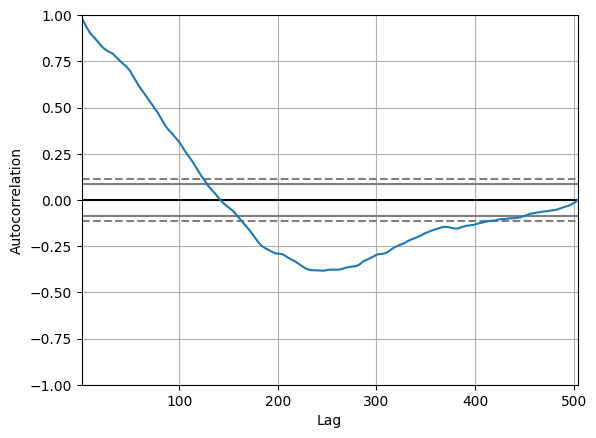

In [44]:
# we can use autocorrelation plots to find a good starting point for ARIMA
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(nflx.close)

Lag plots can also be helpful:

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 1)'>

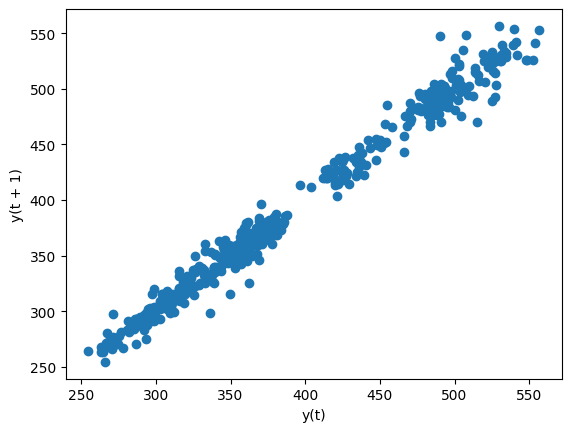

In [45]:
from pandas.plotting import lag_plot
lag_plot(nflx.close)

ARIMA takes a long time to train, so we will start with an AR of 10:

In [46]:
%%capture
# this takes a long time to run, so we will start with a smaller AR of 10
arima_model = StockModeler.arima(nflx, ar=10, i=1, ma=5)

The `summary()` method shows statistics on the model's performance:

In [47]:
# AR = 10, I = 1, MA = 5
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  521
Model:                ARIMA(10, 1, 5)   Log Likelihood               -1921.533
Date:                Mon, 06 Mar 2023   AIC                           3875.067
Time:                        17:55:09   BIC                           3943.128
Sample:                    01-02-2019   HQIC                          3901.729
                         - 12-30-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2117      0.259     -0.818      0.413      -0.719       0.295
ar.L2          0.1860      0.174      1.068      0.286      -0.155       0.527
ar.L3         -0.3464      0.164     -2.114      0.0

The residuals appear to be normally distributed (right subplot); however, their size appears to depend on time (left subplot), so this may not be a good model:

array([<AxesSubplot: title={'center': 'Residuals'}, xlabel='Date', ylabel='Residual'>,
       <AxesSubplot: title={'center': 'Residuals KDE'}, xlabel='Residual', ylabel='Density'>],
      dtype=object)

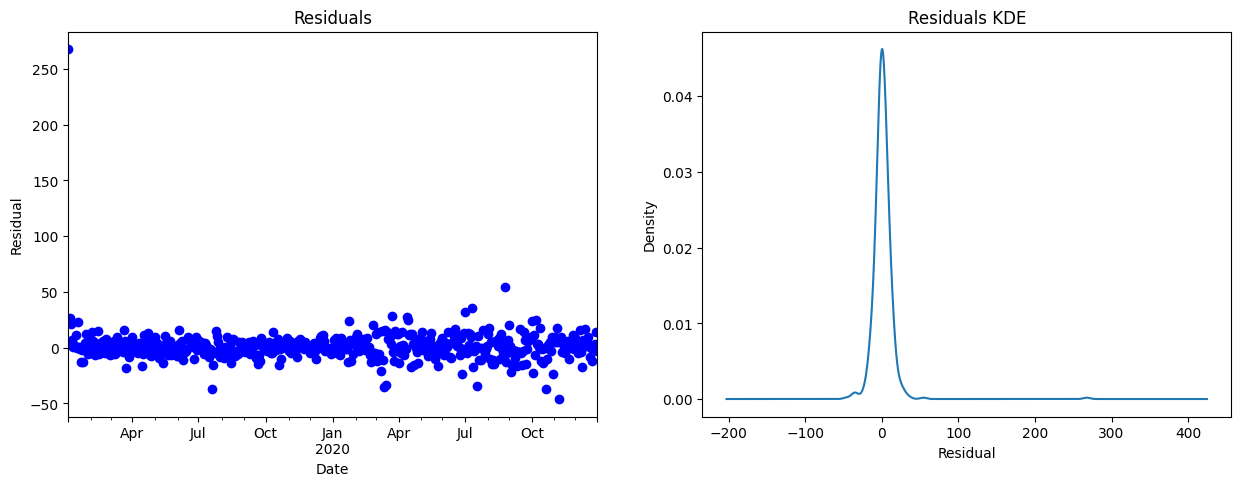

In [48]:
StockModeler.plot_residuals(arima_model)

### Linear Regression
We can build a linear regression using the last value to determine the next value:

In [49]:
X, Y, lm = StockModeler.regression(nflx)
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  close   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          7.462e+05
Date:                Mon, 06 Mar 2023   Prob (F-statistic):                        0.00
Time:                        17:55:09   Log-Likelihood:                         -1884.9
No. Observations:                 503   AIC:                                      3772.
Df Residuals:                     502   BIC:                                      3776.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Once again, the residuals appear to depend on time:

array([<AxesSubplot: title={'center': 'Residuals'}, xlabel='Date', ylabel='Residual'>,
       <AxesSubplot: title={'center': 'Residuals KDE'}, xlabel='Residual', ylabel='Density'>],
      dtype=object)

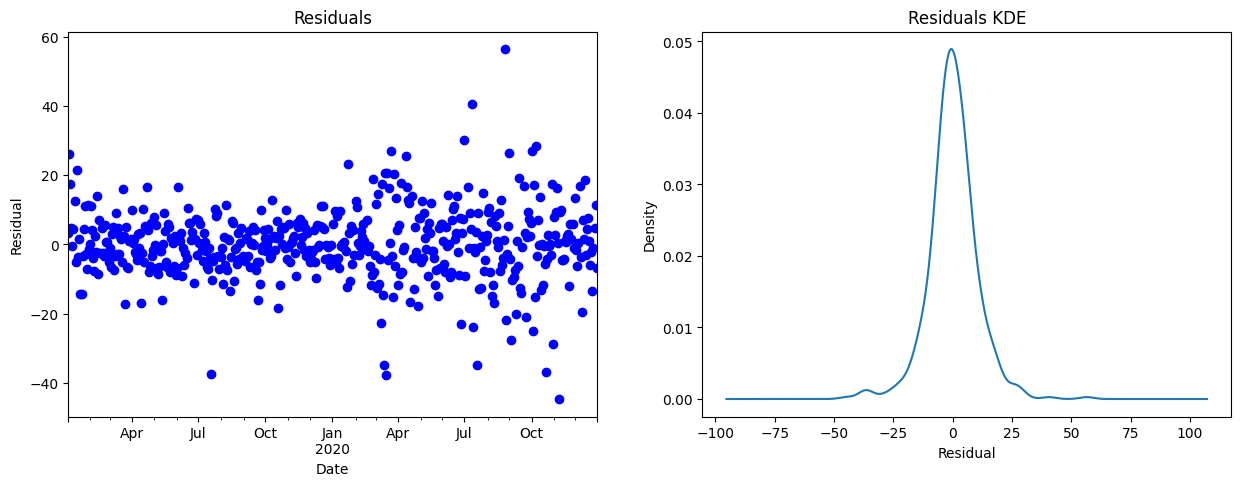

In [50]:
StockModeler.plot_residuals(lm)

### Compare Models Against Actuals
Let's see how these models compared to what actually happened:

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- NFLX: ValueError("time data '20210114' does not match format '%Y-%m-%d'")


/Users/ganesh/Documents/ImportantWork/Practice/StefanieMolinPandas/ch_07/stock_analysis/stock_modeler.py:130: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(


Text(0, 0.5, 'price ($)')

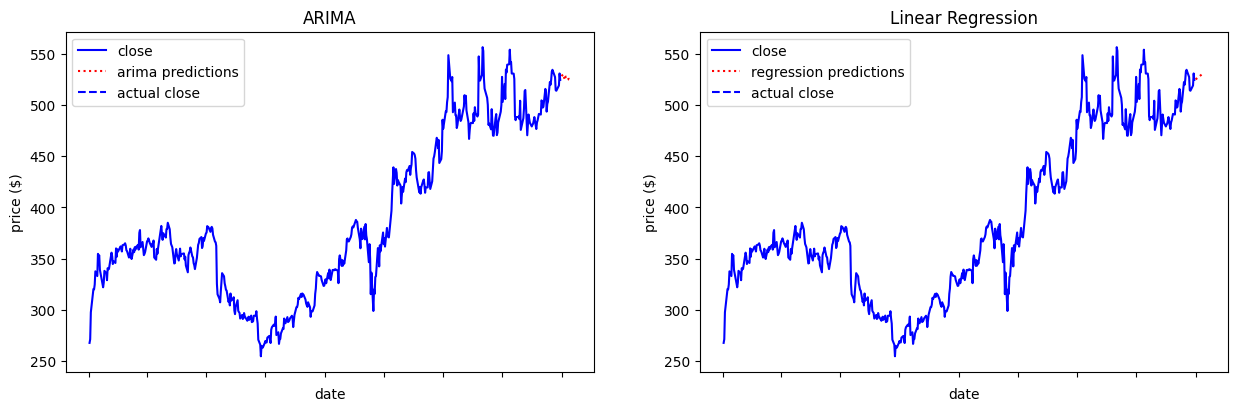

In [51]:
import datetime as dt

start = dt.date(2021, 1, 1)
end = dt.date(2021, 1, 14)

jan = stock_analysis.StockReader(start, end).get_ticker_data('NFLX')

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

arima_ax = StockModeler.arima_predictions(
    nflx, arima_model, start=start, end=end,
    ax=axes[0], title='ARIMA', color='b'
)
jan.close.plot(ax=arima_ax, style='b--', label='actual close')
arima_ax.legend()
arima_ax.set_ylabel('price ($)')

linear_reg = StockModeler.regression_predictions(
    nflx, lm, start=start, end=end,
    ax=axes[1], title='Linear Regression', color='b'
)
jan.close.plot(ax=linear_reg, style='b--', label='actual close')
linear_reg.legend()
linear_reg.set_ylabel('price ($)')

### Random Walks
Prediction is difficult due to randomness. Stock price can be modeled as a [random walk](https://en.wikipedia.org/wiki/Random_walk). Can you find the real stock data? 

*Note: To get different results, pass in a number to the `seed` argument.*

In [52]:
msft = stock_analysis.StockReader('2019-07-01', '2020-06-30').get_ticker_data('MSFT')
real_stock, axes = finance_viz.random_walk_stock_comparison(msft, probs=[0.45, 0.55])
plt.show()

[*********************100%***********************]  1 of 1 completed


NameError: name 'finance_viz' is not defined

Was your guess correct?

In [ ]:
real_stock

NameError: name 'real_stock' is not defined

<hr>
<div style="overflow: hidden; margin-bottom: 10px;">
    <div style="float: left;">
         <a href="../ch_06/3-customizing_visualizations.ipynb">
            <button>&#8592; Chapter 6</button>
        </a>
    </div>
    <div style="float: right;">
        <a href="../../solutions/ch_07/solutions.ipynb">
            <button>Solutions</button>
        </a>
        <a href="../ch_08/anomaly_detection.ipynb">
            <button>Chapter 8 &#8594;</button>
        </a>
    </div>
</div>
<hr>